In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 



In [152]:
list_of_samples = os.listdir('/Users/michael/Data/Luke_terrace_experiment/Plate1')
data_directory = ('/Users/michael/Data/Luke_terrace_experiment/Plate1')
sample_guide = pd.read_csv('/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plate1_guide.csv', sep = '\t')
sample_guide['filename'] = sample_guide['filename'].str.split('.').str[0]
sample_guide

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
...,...,...,...,...,...,...,...,...,...,...
379,B2449500127_n01_LICRNA04_D12,D12,92,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
380,B2449500127_n01_LICRNA04_E12,E12,93,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
381,B2449500127_n01_LICRNA04_F12,F12,94,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
382,B2449500127_n01_LICRNA04_G12,G12,95,LIC643,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04


In [153]:
ex_file_name = list_of_samples[0]
ex_file_clean = ex_file_name.split('.')[0]
ex_file_clean

'A2450525897_n01_LICRNA01_H06'

In [154]:
example_sample_incl_quality = pd.read_csv(f'{data_directory}/{list_of_samples[0]}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'])
ex_quality_data = example_sample_incl_quality['Unstranded'][0:4].to_list()
ex_quality_data.append(example_sample_incl_quality['Forward'][3].item())
example_sample_read_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'], data = [ex_quality_data], index = [ex_file_clean])
ex_cleaned_sample_data = pd.read_csv(f'{data_directory}/{list_of_samples[0]}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)
ex_cleaned_sample_data


,Gene Name,Unstranded,Forward,Reverse
0,AT1G01010,0,0,0
1,AT1G01020,48,48,0
2,AT1G03987,0,0,0
3,AT1G01030,34,34,0
4,AT1G01040,53,111,162
...,...,...,...,...
38290,ArthCt118,0,0,4
38291,ArthCp083,30,30,0
38292,ArthCt111,0,0,0
38293,ArthCp084,2,0,2


In [158]:
ex_cleaned_sample_data[['Gene Name']].to_csv('/Users/michael/Data/Reference_data/Arabdidopsis_empty_reads_per_gene.csv', index = False)

In [157]:
quality_meta_data

,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
A2450525897_n01_LICRNA01_H06,4328244,499905,321262,442619,51564
A2450525897_n01_LICRNA01_F06,4579055,780856,331588,745568,79267
A2450525897_n01_LICRNA01_E01,3004324,309156,135512,229101,26474
A2450525897_n01_LICRNA01_H10,2291624,408948,159867,259492,34365
A2450525897_n01_LICRNA01_F10,1988907,313884,161241,268582,33331
...,...,...,...,...,...
A2450525897_n01_LICRNA01_F03,1573677,193245,34840,65954,6987
A2450525897_n01_LICRNA01_H03,9002596,632071,270031,416397,51075
A2450525897_n01_LICRNA01_C09,4372037,860061,361762,686872,82284
A2450525897_n01_LICRNA01_E04,2517607,334480,36033,120737,12554


In [24]:
ex_cleaned_sample_data.sum()

Gene Name     AT1G01010AT1G01020AT1G03987AT1G01030AT1G01040A...
Unstranded                                              4718081
Forward                                                 5075118
Reverse                                                  404903
dtype: object

In [25]:

def Luke_file_parser(file_name, quality_dataframe, df_with_gene_names,data_directory = '/Users/michael/Data',):
    file_clean = file_name.split('.')[0]
    sample_incl_quality = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'])
    quality_data = sample_incl_quality['Unstranded'][0:4].to_list()
    quality_data.append(sample_incl_quality['Forward'][3].item())
    sample_read_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'], data = [quality_data], index = [file_clean])
    quality_dataframe = pd.concat([quality_dataframe, sample_read_quality_meta_data])
    cleaned_sample_data = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)
    df_with_gene_names[file_clean] = cleaned_sample_data['Forward'].to_list()
    return quality_dataframe, df_with_gene_names


In [26]:
cleaned_sample_data = pd.read_csv(f'{data_directory}/{ex_file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)


In [27]:
expression_data = pd.DataFrame(index = ex_cleaned_sample_data['Gene Name'].to_list())
quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'])
for file in list_of_samples:
    quality_meta_data, expression_data = Luke_file_parser(file, quality_meta_data, expression_data, data_directory)


In [28]:
cleaned_sample_data['Forward'].to_list()

[0,
 48,
 0,
 34,
 111,
 0,
 0,
 343,
 0,
 198,
 10,
 0,
 181,
 673,
 5893,
 7,
 753,
 13,
 105,
 0,
 64,
 0,
 410,
 0,
 20,
 0,
 0,
 3,
 9,
 22,
 0,
 58,
 0,
 9,
 58,
 52,
 163,
 10,
 0,
 0,
 19,
 148,
 0,
 0,
 3902,
 0,
 7,
 24,
 0,
 25,
 19,
 18,
 42,
 0,
 0,
 226,
 52,
 16,
 3,
 0,
 0,
 0,
 1022,
 15,
 409,
 35,
 66,
 518,
 0,
 116,
 430,
 0,
 3,
 36,
 0,
 38,
 361,
 554,
 197,
 5,
 126,
 0,
 2,
 2,
 0,
 15,
 0,
 0,
 0,
 0,
 3,
 36,
 3,
 164,
 0,
 29,
 0,
 32,
 0,
 0,
 3,
 10,
 0,
 4,
 17,
 146,
 0,
 159,
 0,
 171,
 88,
 4,
 14,
 20,
 0,
 0,
 9,
 0,
 83,
 0,
 103,
 0,
 31,
 0,
 39,
 8,
 116,
 360,
 0,
 40,
 53,
 41,
 14,
 0,
 0,
 18,
 4,
 31,
 0,
 0,
 293,
 105,
 75,
 63,
 180,
 176,
 0,
 0,
 288,
 32,
 483,
 135,
 76,
 28,
 0,
 74,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 17,
 64,
 0,
 314,
 6,
 101,
 303,
 0,
 0,
 2,
 0,
 50,
 28,
 23,
 5,
 162,
 29,
 15,
 0,
 6,
 16,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 0,
 254,
 0,
 0,
 228,
 0,
 0,
 0,
 0,
 0,
 970,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0

In [29]:
expression_data

,A2450525897_n01_LICRNA01_H06,A2450525897_n01_LICRNA01_F06,A2450525897_n01_LICRNA01_E01,A2450525897_n01_LICRNA01_H10,A2450525897_n01_LICRNA01_F10,A2450525897_n01_LICRNA01_D04,A2450525897_n01_LICRNA01_A02,A2450525897_n01_LICRNA01_D08,A2450525897_n01_LICRNA01_D12,A2450525897_n01_LICRNA01_B05,...,A2450525897_n01_LICRNA01_A07,A2450525897_n01_LICRNA01_G06,A2450525897_n01_LICRNA01_A11,A2450525897_n01_LICRNA01_C05,A2450525897_n01_LICRNA01_E12,A2450525897_n01_LICRNA01_F03,A2450525897_n01_LICRNA01_H03,A2450525897_n01_LICRNA01_C09,A2450525897_n01_LICRNA01_E04,A2450525897_n01_LICRNA01_E08
AT1G01010,0,12,19,6,6,27,13,8,0,0,...,14,4,15,10,4,2,8,7,0,11
AT1G01020,48,87,27,24,42,79,4,63,0,13,...,60,40,29,25,58,19,42,70,28,45
AT1G03987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,34,55,22,5,6,35,0,32,0,18,...,21,23,3,14,35,0,32,47,26,14
AT1G01040,111,150,41,97,85,103,90,55,0,21,...,121,61,27,64,82,36,205,168,76,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ArthCt118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ArthCp083,30,3,3,8,4,2,1,14,0,1,...,3,0,0,0,4,0,4,5,0,12
ArthCt111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ArthCp084,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [30]:
sample_guide

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01


In [31]:
quality_meta_data

,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
A2450525897_n01_LICRNA01_H06,4328244,499905,321262,442619,51564
A2450525897_n01_LICRNA01_F06,4579055,780856,331588,745568,79267
A2450525897_n01_LICRNA01_E01,3004324,309156,135512,229101,26474
A2450525897_n01_LICRNA01_H10,2291624,408948,159867,259492,34365
A2450525897_n01_LICRNA01_F10,1988907,313884,161241,268582,33331
...,...,...,...,...,...
A2450525897_n01_LICRNA01_F03,1573677,193245,34840,65954,6987
A2450525897_n01_LICRNA01_H03,9002596,632071,270031,416397,51075
A2450525897_n01_LICRNA01_C09,4372037,860061,361762,686872,82284
A2450525897_n01_LICRNA01_E04,2517607,334480,36033,120737,12554


In [32]:
full_meta_data = sample_guide.merge(quality_meta_data, left_on = 'filename', right_index = True)

In [33]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048,334817,112554,202285,22008
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184,776239,226718,494847,49830
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008,427910,97848,271449,28416
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467,177674,49095,123691,13452
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324,309156,135512,229101,26474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,0,0,0,0,0
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,6099952,336225,387240,622435,72994
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,2140653,341382,216214,424028,48951
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,3435305,624893,310777,626902,75732


Text(3, 100000, 'not much with date')

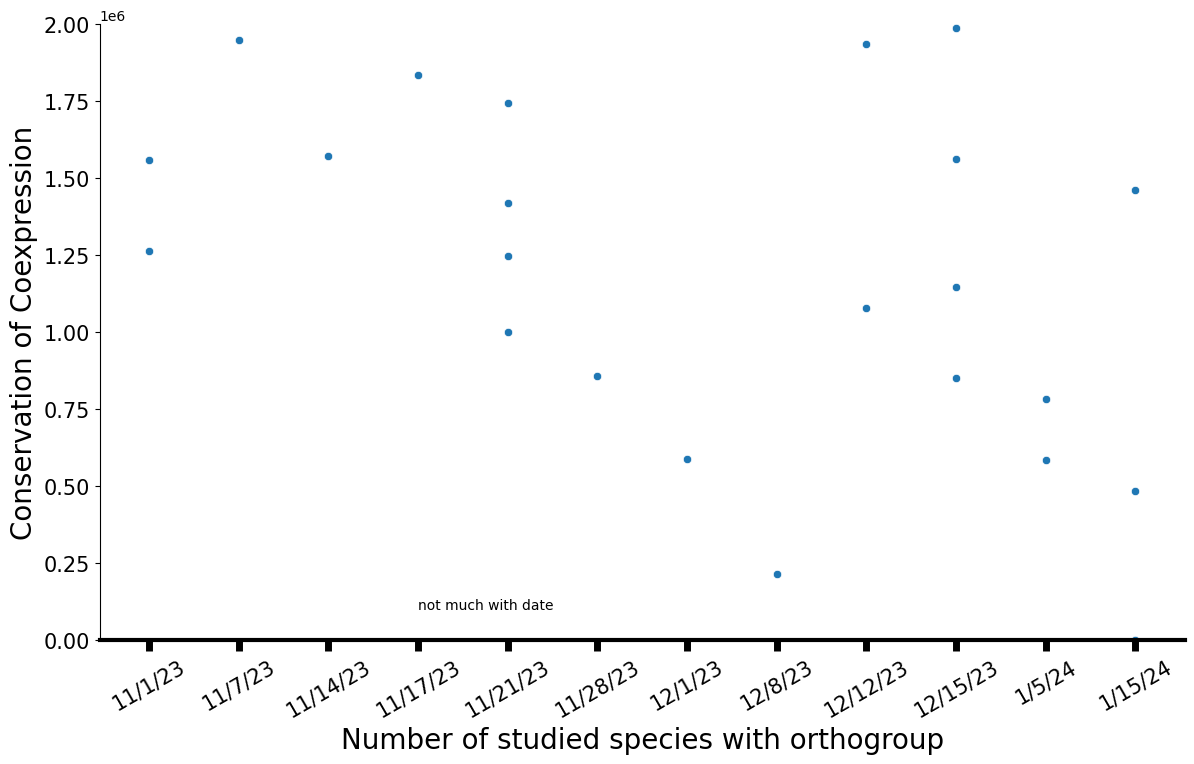

In [103]:
fig, ax = plt.subplots(figsize = (14,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(x = full_meta_data['date'], y = full_meta_data['Unmapped'])

plt.ylabel("Conservation of Coexpression", fontsize = 20)
plt.xlabel("Number of studied species with orthogroup", fontsize = 20)
sns.despine()

#ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(3)
ax.spines["left"].set_color("black")
#sns.move_legend(ax, 'lower right')
#plt.xlim((-7,7))
plt.ylim((0, 2000000))
#ax.set_xticklabels(labels = ['Conserved','Compensatory Drift','Diverged'])

#plt.title("Conservation of orthogroup coexpression captures conserved  \n gene relationships missed in genewise comparisons", fontsize = 20)
ax.tick_params(axis = 'x', width = 5, length = 8)
plt.xticks(fontsize = 15,rotation =30,)
plt.yticks(fontsize = 15)
ax.text(3 , 100000,  'not much with date')


In [35]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048,334817,112554,202285,22008
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184,776239,226718,494847,49830
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008,427910,97848,271449,28416
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467,177674,49095,123691,13452
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324,309156,135512,229101,26474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,0,0,0,0,0
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,6099952,336225,387240,622435,72994
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,2140653,341382,216214,424028,48951
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,3435305,624893,310777,626902,75732


In [42]:
full_meta_data["plate_row"] = full_meta_data['plate.pos'].str[0]
full_meta_data['plate_col'] = full_meta_data['plate.pos'].str[1:].astype(int)
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048,334817,112554,202285,22008,A,1
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184,776239,226718,494847,49830,B,1
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008,427910,97848,271449,28416,C,1
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467,177674,49095,123691,13452,D,1
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324,309156,135512,229101,26474,E,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,0,0,0,0,0,D,12
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,6099952,336225,387240,622435,72994,E,12
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,2140653,341382,216214,424028,48951,F,12
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,3435305,624893,310777,626902,75732,G,12


In [46]:
meta_data_heatmap_format = full_meta_data.pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped')
meta_data_heatmap_format

plate_col,1,2,3,4,5,6,7,8,9,10,11,12
plate_row,,,,,,,,,,,,
A,2633048,1949300,2288354,1834214,1745314,859626,6634274,216804,1934779,3888067,2986175,485464
B,5074184,5558289,11156787,3026183,1247492,5357625,2614702,6974921,2451014,2195163,18478194,8749173
C,2283008,2901362,3759413,4683380,1002663,2333942,8755597,4807442,4372037,852463,584473,1463618
D,1263467,5147075,4939895,3464212,2545919,6273459,6028091,3962349,5011155,4956041,783744,0
E,3004324,4498762,2727574,2517607,2604790,5068855,6402875,2881216,2475929,1148030,2446745,6099952
F,4577311,7244532,1573677,3844291,2221325,4579055,4607098,5416335,1079511,1988907,4005201,2140653
G,1558637,3886559,9494464,2241674,1419548,3141383,588213,6046971,3220773,1562145,4013819,3435305
H,5166151,2712289,9002596,4890090,3916640,4328244,8255436,6246236,2192198,2291624,4351928,3551217


In [58]:
meta_data_heatmap_format.index = meta_data_heatmap_format.index.astype('str')
meta_data_heatmap_format

plate_col,1,2,3,4,5,6,7,8,9,10,11,12
plate_row,,,,,,,,,,,,
A,2633048,1949300,2288354,1834214,1745314,859626,6634274,216804,1934779,3888067,2986175,485464
B,5074184,5558289,11156787,3026183,1247492,5357625,2614702,6974921,2451014,2195163,18478194,8749173
C,2283008,2901362,3759413,4683380,1002663,2333942,8755597,4807442,4372037,852463,584473,1463618
D,1263467,5147075,4939895,3464212,2545919,6273459,6028091,3962349,5011155,4956041,783744,0
E,3004324,4498762,2727574,2517607,2604790,5068855,6402875,2881216,2475929,1148030,2446745,6099952
F,4577311,7244532,1573677,3844291,2221325,4579055,4607098,5416335,1079511,1988907,4005201,2140653
G,1558637,3886559,9494464,2241674,1419548,3141383,588213,6046971,3220773,1562145,4013819,3435305
H,5166151,2712289,9002596,4890090,3916640,4328244,8255436,6246236,2192198,2291624,4351928,3551217


In [63]:
meta_data_heatmap_format.reset_index(drop = True)

plate_col,1,2,3,4,5,6,7,8,9,10,11,12
0,2633048,1949300,2288354,1834214,1745314,859626,6634274,216804,1934779,3888067,2986175,485464
1,5074184,5558289,11156787,3026183,1247492,5357625,2614702,6974921,2451014,2195163,18478194,8749173
2,2283008,2901362,3759413,4683380,1002663,2333942,8755597,4807442,4372037,852463,584473,1463618
3,1263467,5147075,4939895,3464212,2545919,6273459,6028091,3962349,5011155,4956041,783744,0
4,3004324,4498762,2727574,2517607,2604790,5068855,6402875,2881216,2475929,1148030,2446745,6099952
5,4577311,7244532,1573677,3844291,2221325,4579055,4607098,5416335,1079511,1988907,4005201,2140653
6,1558637,3886559,9494464,2241674,1419548,3141383,588213,6046971,3220773,1562145,4013819,3435305
7,5166151,2712289,9002596,4890090,3916640,4328244,8255436,6246236,2192198,2291624,4351928,3551217


Text(0.5, 25.722222222222214, 'Plate Column')

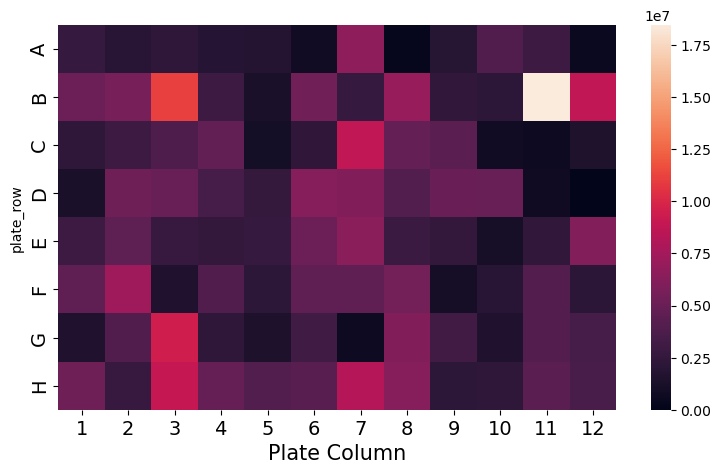

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_heatmap_format.astype(float))
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel()


In [109]:
total_reads = expression_data.sum()
total_reads.name = 'Total Reads'
total_reads

A2450525897_n01_LICRNA01_H06    5075118
A2450525897_n01_LICRNA01_F06    9046843
A2450525897_n01_LICRNA01_E01    2680737
A2450525897_n01_LICRNA01_H10    3177403
A2450525897_n01_LICRNA01_F10    3249827
                                 ...   
A2450525897_n01_LICRNA01_F03     709805
A2450525897_n01_LICRNA01_H03    4554314
A2450525897_n01_LICRNA01_C09    8495733
A2450525897_n01_LICRNA01_E04    1238138
A2450525897_n01_LICRNA01_E08    3060846
Name: Total Reads, Length: 97, dtype: int64

In [ ]:
full_meta_data = full_meta_data.merge(total_reads, left_on = 'filename', right_index = True,)

Text(83.22222222222221, 0.5, 'Plate Row')

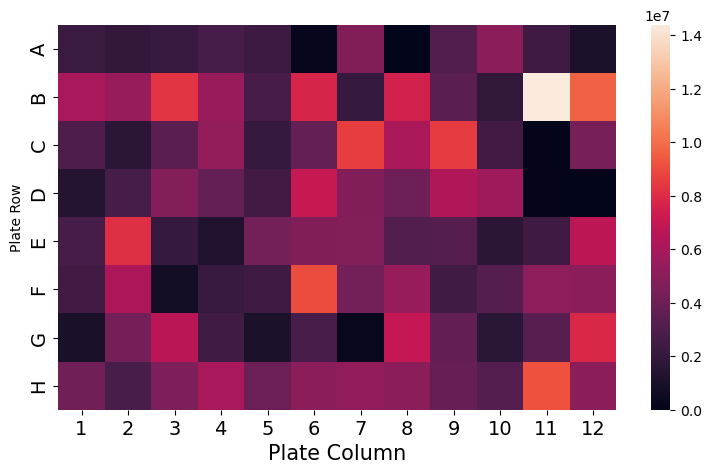

In [122]:
meta_data_total_reads = full_meta_data.pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads', )
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_total_reads.astype(float))
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

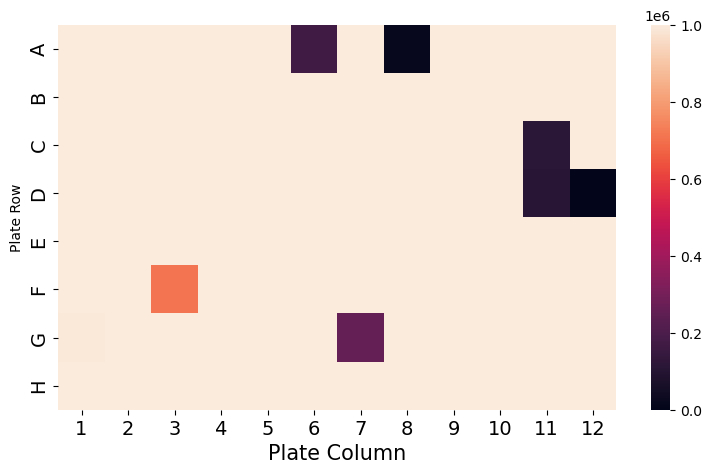

In [121]:
meta_data_total_reads = full_meta_data.pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads', )
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_total_reads.astype(float), vmax = 1_000_000)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

In [124]:
list_plate_2_samples = os.listdir('/Users/michael/Data/Luke_terrace_experiment/Plate2')

In [127]:
plate_2_expression_data = pd.DataFrame(index = ex_cleaned_sample_data['Gene Name'].to_list())
plate_2_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'])
for file in list_plate_2_samples:
    plate_2_quality_meta_data, plate_2_expression_data = Luke_file_parser(file, plate_2_quality_meta_data, plate_2_expression_data, data_directory = '/Users/michael/Data/Luke_terrace_experiment/Plate2')

In [146]:
full_meta_data_plate_2 = sample_guide.merge(plate_2_quality_meta_data, left_on = 'filename', right_index = True)
full_meta_data_plate_2["plate_row"] = full_meta_data_plate_2['plate.pos'].str[0]
full_meta_data_plate_2['plate_col'] = full_meta_data_plate_2['plate.pos'].str[1:].astype(int)
meta_data_heatmap_format = full_meta_data_plate_2.pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped')


In [147]:
total_reads_plate_2 = plate_2_expression_data.sum()
total_reads_plate_2.name = 'Total Reads'
full_meta_data_plate_2 = full_meta_data_plate_2.merge(total_reads_plate_2, left_on = 'filename', right_index = True,)

In [148]:
full_meta_data_plate_2

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads
96,A2449446903_n01_LICRNA02_A01,A01,1,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284,285983,82176,103821,14939,A,1,1246970
97,A2449446903_n01_LICRNA02_B01,B01,2,LIC158,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,2086106,465461,220515,285686,41989,B,1,3577109
98,A2449446903_n01_LICRNA02_C01,C01,3,LIC159,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,2074556,689934,255116,256430,41959,C,1,3236577
99,A2449446903_n01_LICRNA02_D01,D01,4,LIC160,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,8431037,2212178,996469,968722,147633,D,1,12227612
100,A2449446903_n01_LICRNA02_E01,E01,5,LIC161,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,6050050,877963,588198,751231,111929,E,1,9359040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,A2449446903_n01_LICRNA02_D12,D12,92,LIC316,plant,t27,3/12/24,8:00,LIC_04,LICRNA_02,7598735,1124344,521797,478055,68830,D,12,5785441
188,A2449446903_n01_LICRNA02_E12,E12,93,LIC317,plant,t27,3/12/24,8:00,LIC_04,LICRNA_02,13233506,1496711,1113389,1069923,151328,E,12,12903065
189,A2449446903_n01_LICRNA02_F12,F12,94,LIC318,plant,t27,3/12/24,8:00,LIC_04,LICRNA_02,13812648,1982140,1108870,908073,145273,F,12,11125462
190,A2449446903_n01_LICRNA02_G12,G12,95,LIC319,plant,t27,3/12/24,8:00,LIC_04,LICRNA_02,4477650,1039683,440055,419760,60161,G,12,5142449


Text(83.22222222222221, 0.5, 'Plate Row')

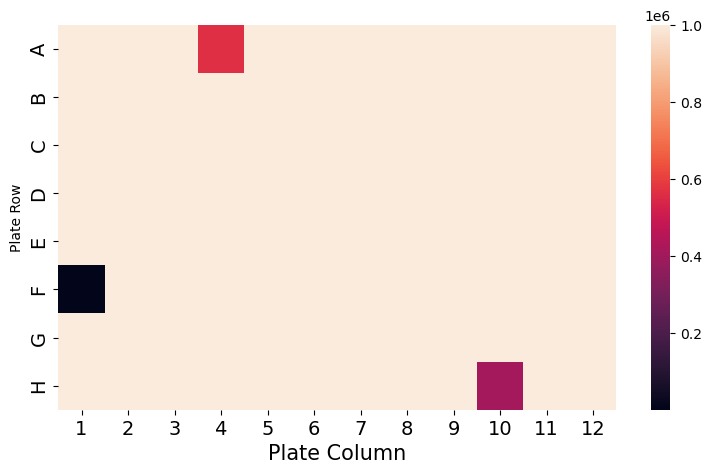

In [149]:
meta_data_total_reads_plate_2 = full_meta_data_plate_2.pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads', )
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_total_reads_plate_2.astype(float), vmax = 1_000_000)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

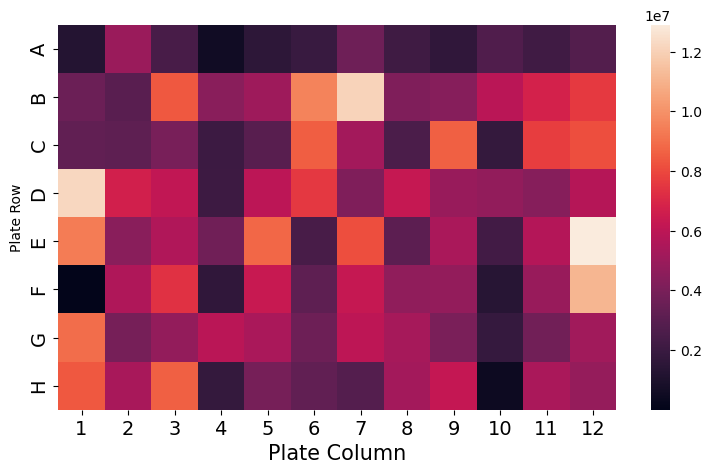

In [150]:
meta_data_total_reads_plate_2 = full_meta_data_plate_2.pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads', )
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_total_reads_plate_2.astype(float),)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')